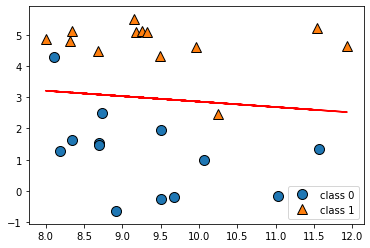

In [8]:
# Logistic Regression을 graphic하게 알아보아요!

import numpy as np
from sklearn import linear_model
import mglearn # utility module. data set을 가지고 있음
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

# Training Data Set
x,y = mglearn.datasets.make_forge()
# print(x) # 독립변수(2차원 ndarray)
# print(y) # 종속변수(1차원 ndarray)

mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.legend(['class 0', 'class 1'], loc='best')
# plt.show()

model = linear_model.LinearRegression()
model.fit(x[:,0].reshape(-1,1), x[:,1].reshape(-1,1))

plt.plot(x[:,0], x[:,0]*model.coef_.ravel() + model.intercept_, color='r')
plt.show()

[[0.63265306]]


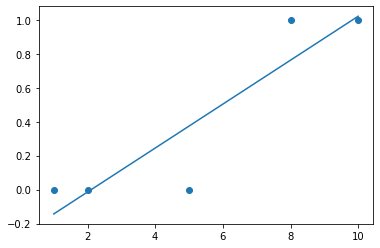

In [10]:
# 분류 문제를 Linear Regression으로 해결할 수 있을까?

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

x_data = np.array([1, 2, 5, 8, 10]) # 독립변수. 공부시간
t_data = np.array([0, 0, 0, 1, 1]) # 종속변수. 합격여부(0 : 불합격, 1 : 합격)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data.reshape(-1,1), t_data.reshape(-1,1))

# prediction
print(model.predict(np.array([[7]]))) # [[0.63265306]]. 0.5보다 크다! 합격?

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_)
plt.show()

[[0.41831972]]


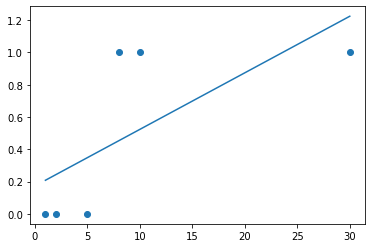

In [12]:
# 분류 문제를 Linear Regression으로 해결할 수 있을까?

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

x_data = np.array([1, 2, 5, 8, 10, 30]) # 독립변수. 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1]) # 종속변수. 합격여부(0 : 불합격, 1 : 합격)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data.reshape(-1,1), t_data.reshape(-1,1))

# prediction
print(model.predict(np.array([[7]]))) # [[0.41831972]]. 0.5보다 크다! 아까는 붙었는데 왜 불합격?!

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_)
plt.show()

In [13]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
# Logistic Regression by Python

import numpy as np

# 다변수 함수의 수치미분 코드
def numerical_derivative(f,x):
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        
        idx = it.multi_index
        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)

        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

        x[idx] = tmp
        it.iternext()
        
    return derivative_x

# Training Data Set
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(-1,1) # 행렬곱연산을 위해 2차원으로 reshape
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# Weight, bias 정의
W = np.random.rand(1,1)
b = np.random.rand(1)

# Logistic Regression Model, Predict Model, Hypothesis
def predict(x):
    z = np.dot(x,W) + b          # Linear Regression Model. np.dot은 행렬곱연산
    y = 1 / (1 + np.exp(-1 * z)) # Logistic Regression Model. Sigmoid func. np.exp은 몇 승(**, ^)
    
    result = 0 # 계산되는 값은 결국 0 ~ 1 사이
    
    if y >= 0.5:
        result = 1
    else:
        result = 0
        
    return y, result

# Cross Entropy(log loss)
def loss_func(input_data): # [W b]
    input_W = input_data[:-1].reshape(-1,1)
    input_b = input_data[-1]
    
    z = np.dot(x_data,input_W) + input_b # 행렬곱 : x_data(400, 3) * input_W(3,1) -> (400, 1)
    y = 1 / (1 + np.exp(-1 * z)) # Sigmoid func
    
    delta = 1e-7
    
    # delta로 아주 작은 값을 부여하기 때문에 0이 나와서 오류나지 않음
    return - 1 * np.sum(t_data * np.log(y + delta) + (1 - t_data) * np.log(1 - y + delta))

# learning rate
learning_rate = 1e-4

# 반복학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[:-1].reshape(-1,1)
    b = b - derivative_result[-1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

W : [[0.79195228]], b : [0.32494315], loss : 35.38535632388121
W : [[0.2661517]], b : [-3.13685334], loss : 2.905683488215485
W : [[0.37881267]], b : [-4.64554449], loss : 2.126268408704095
W : [[0.45488905]], b : [-5.66139992], loss : 1.7776931929708368
W : [[0.51396055]], b : [-6.44821391], loss : 1.5693808678094925
W : [[0.56303277]], b : [-7.10044723], loss : 1.426455793381139
W : [[0.60544471]], b : [-7.66313964], loss : 1.3201598890891133
W : [[0.64306362]], b : [-8.16147512], loss : 1.2368233381696945
W : [[0.67704657]], b : [-8.61105136], loss : 1.1690142406350192
W : [[0.70816376]], b : [-9.02224425], loss : 1.1122988247524501


In [16]:
# Prediction
study_hour = np.array([[13]]) # 12시간은 불합격, 14시간은 합격
y_prob, result = predict(study_hour)

print('합격확률 : {}, 합격여부 : {}'.format(y_prob,result)) # 합격확률 : [[0.54440637]], 합격여부 : 1

합격확률 : [[0.54440637]], 합격여부 : 1


In [17]:
# Logistic Regression by Sklearn

from sklearn import linear_model

# Training Data Set
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# Model 생성
model = linear_model.LogisticRegression()

# Model 학습
model.fit(x_data, t_data)

# Prediction
study_hour = np.array([[13]])

result = model.predict(study_hour) # 확률을 제외한 합격여부만 알려줌
result_prob = model.predict_proba(study_hour) # 불합격 / 합격 확률

print('합격확률 : {}, 합격여부 : {}'.format(result_prob,result)) # 합격확률 : [[0.50009391 0.49990609]], 합격여부 : [0]?!

합격확률 : [[0.50009391 0.49990609]], 합격여부 : [0]


In [20]:
# Logistic Regression by Tensorflow

import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Training Data Set
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# Placeholder
X = tf.placeholder(shape=[None, 1], dtype=tf.float32)
T = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random.normal([1,1]))
b = tf.Variable(tf.random.normal([1]))

# Model 생성
logit = tf.matmul(X,W) + b # Linear Regression Model
H = tf.sigmoid(logit) # Logistic Regression Model. Sigmoid func

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T)) # 인자 두 개

# train node
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(loss)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 반복 학습
for step in range(30000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss], feed_dict={X: x_data, T: t_data})
    
    if step % 3000 == 0:
        print('W : {}, b: {}, loss : {}'.format(W_val, b_val, loss_val))

W : [[0.8174074]], b: [-0.00233854], loss : 3.471754550933838
W : [[0.07751522]], b: [-0.5934596], loss : 0.5654752850532532
W : [[0.11062031]], b: [-1.0434887], loss : 0.4974733293056488
W : [[0.13949803]], b: [-1.4340714], loss : 0.4462619721889496
W : [[0.16495332]], b: [-1.7773131], loss : 0.4067222476005554
W : [[0.18764499]], b: [-2.0827105], loss : 0.3754274249076843
W : [[0.20809023]], b: [-2.3575387], loss : 0.350088894367218
W : [[0.2266893]], b: [-2.6073394], loss : 0.32915788888931274
W : [[0.24375321]], b: [-2.8363805], loss : 0.3115634322166443
W : [[0.2595242]], b: [-3.0479677], loss : 0.2965494394302368


In [22]:
# Prediction
study_hour = np.array([[13]])
result = sess.run(H, feed_dict={X: study_hour})
print('합격확률 : {}'.format(result)) # 합격확률 : [[0.5792821]]

합격확률 : [[0.5792821]]
